In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')


In [23]:
attrition = pd.read_csv('Desktop\HR-Employee-Attrition.csv')
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [24]:
# Looking for NaN
display(attrition.isnull().any())

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

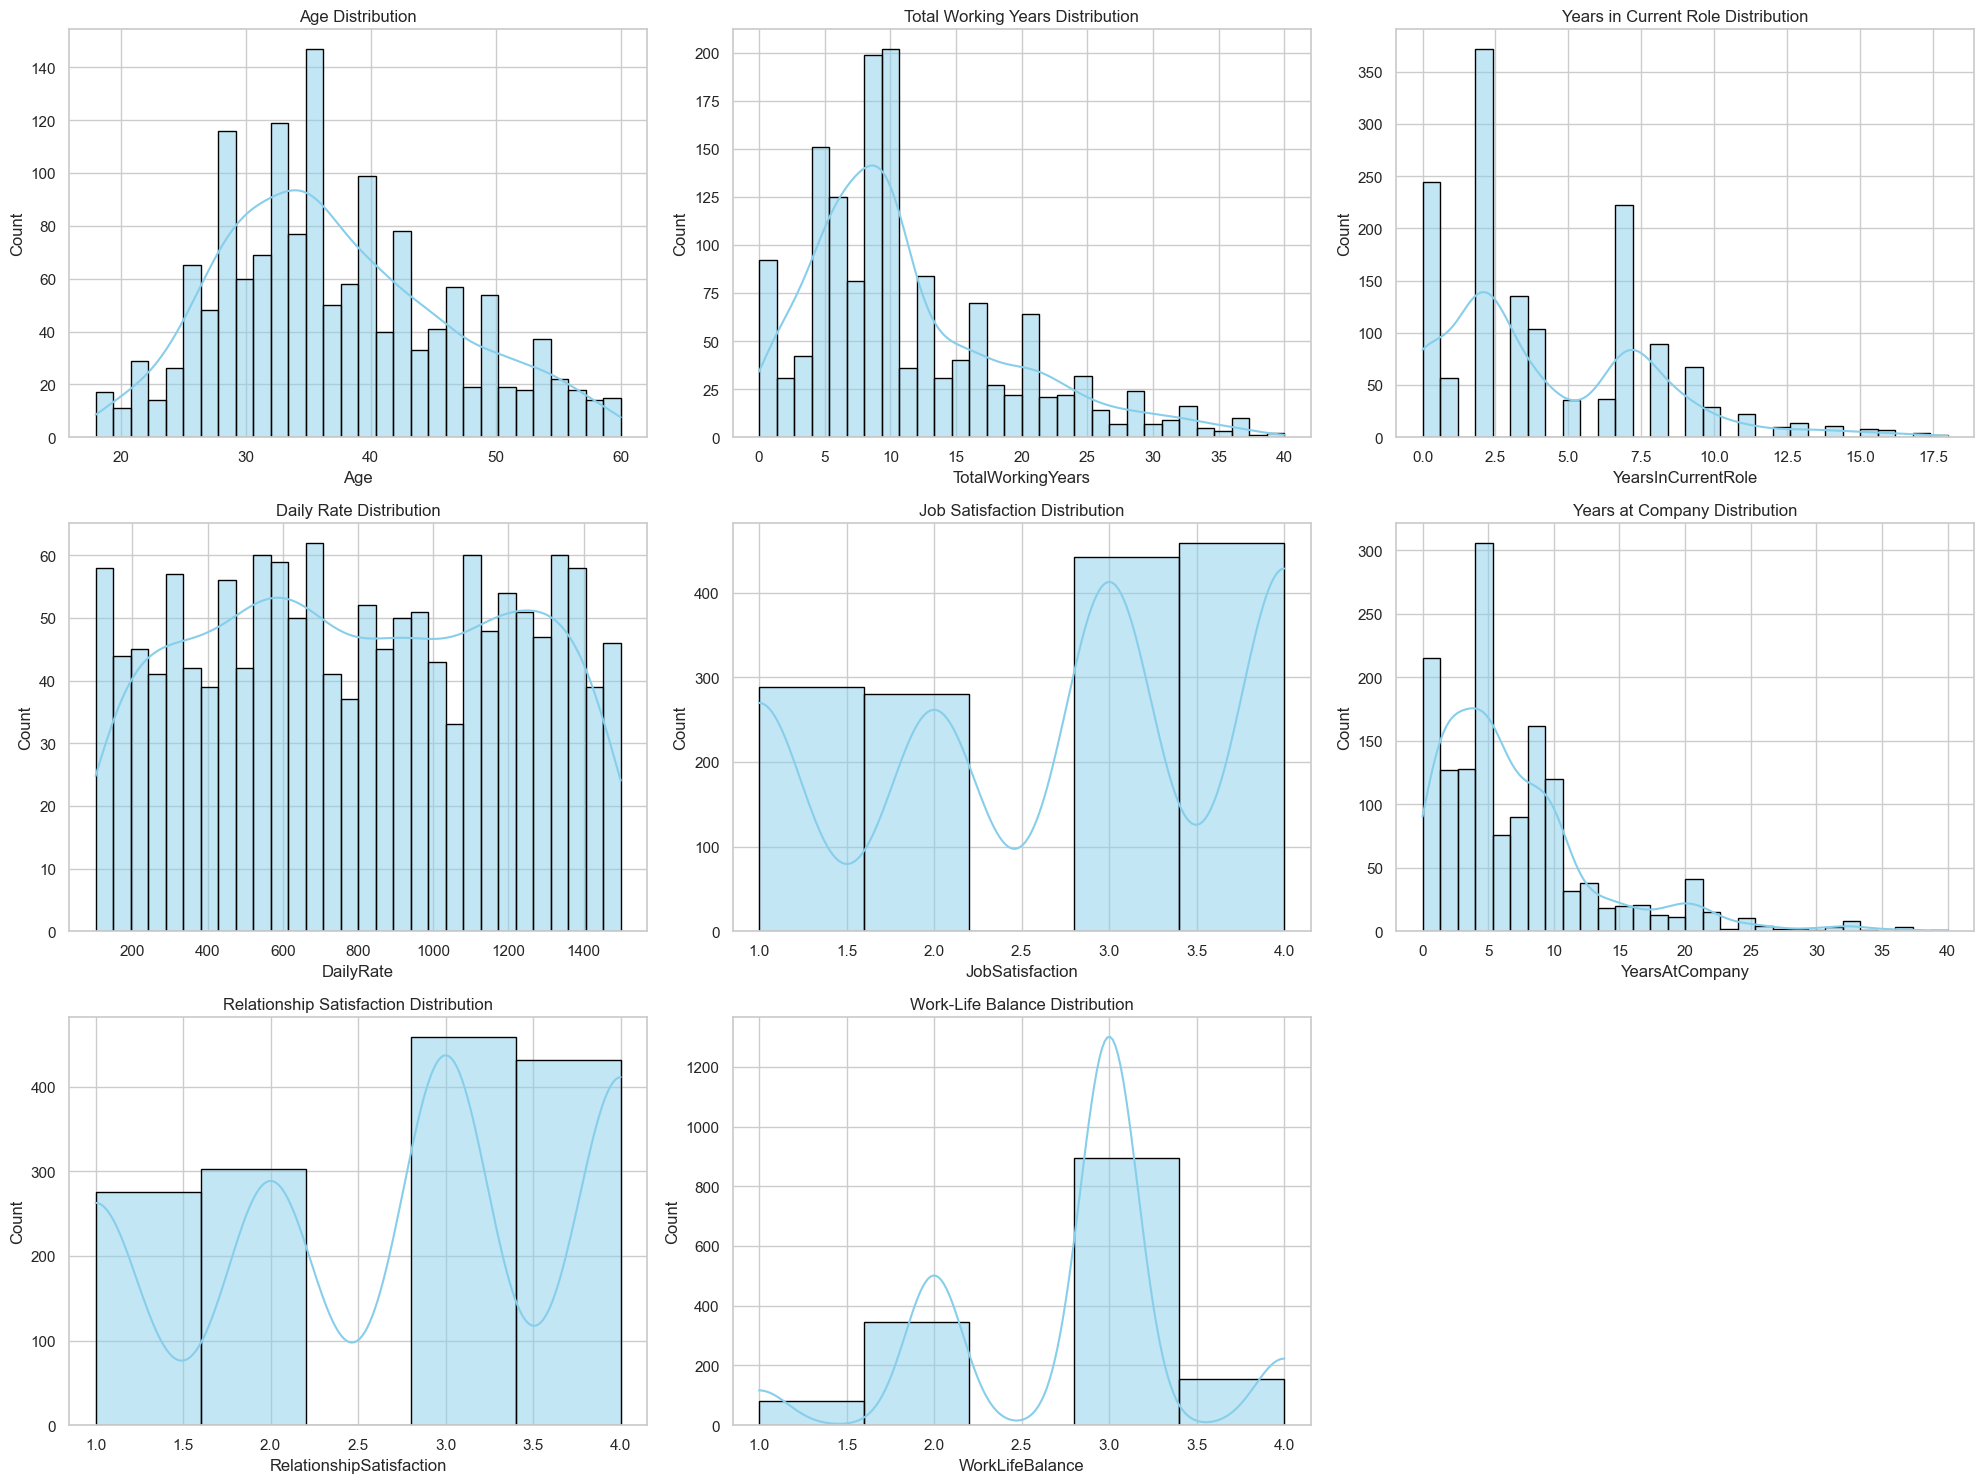

In [25]:
import seaborn as sns

# Create a grid of histograms
sns.set(style="whitegrid")

plt.figure(figsize=(20, 15))

plt.subplot(3, 3, 1)
sns.histplot(data=attrition, x='Age', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution')

plt.subplot(3, 3, 2)
sns.histplot(data=attrition, x='TotalWorkingYears', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Total Working Years Distribution')

plt.subplot(3, 3, 3)
sns.histplot(data=attrition, x='YearsInCurrentRole', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Years in Current Role Distribution')

plt.subplot(3, 3, 4)
sns.histplot(data=attrition, x='DailyRate', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Daily Rate Distribution')

plt.subplot(3, 3, 5)
sns.histplot(data=attrition, x='JobSatisfaction', bins=5, kde=True, color='skyblue', edgecolor='black')
plt.title('Job Satisfaction Distribution')

plt.subplot(3, 3, 6)
sns.histplot(data=attrition, x='YearsAtCompany', bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Years at Company Distribution')

plt.subplot(3, 3, 7)
sns.histplot(data=attrition, x='RelationshipSatisfaction', bins=5, kde=True, color='skyblue', edgecolor='black')
plt.title('Relationship Satisfaction Distribution')

plt.subplot(3, 3, 8)
sns.histplot(data=attrition, x='WorkLifeBalance', bins=5, kde=True, color='skyblue', edgecolor='black')
plt.title('Work-Life Balance Distribution')

plt.tight_layout()
plt.show()


In [26]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

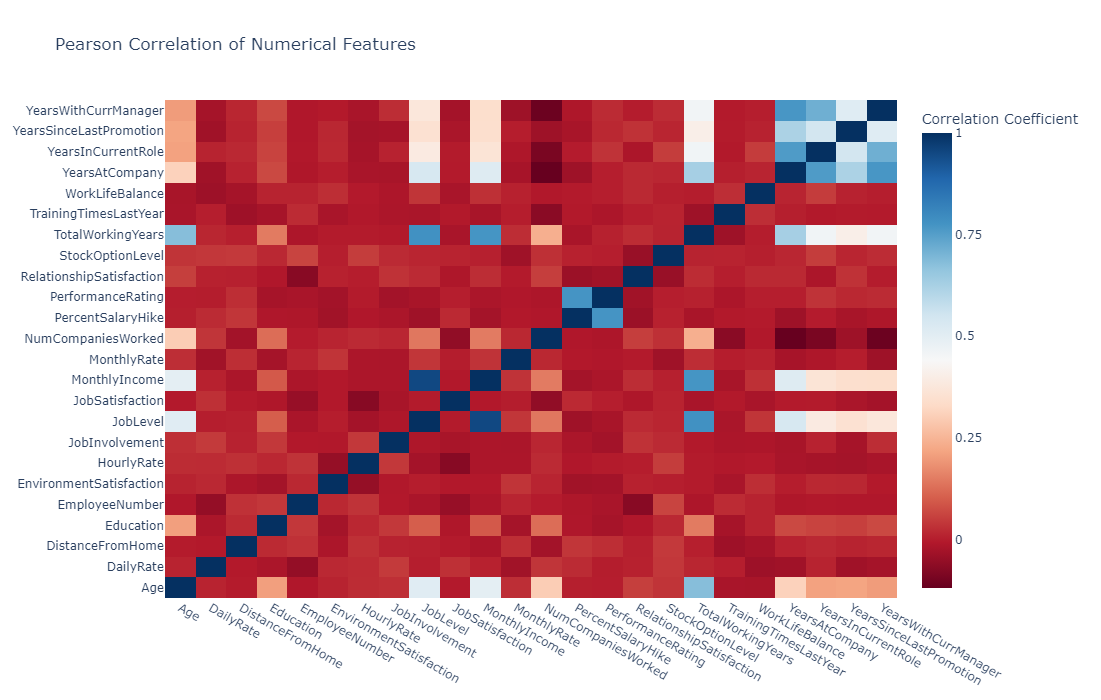

In [27]:
import plotly.graph_objs as go
import plotly.offline as py
import numpy as np

# Assuming 'attrition' is your DataFrame containing the data

numerical = ['Age', 'DailyRate', 'DistanceFromHome', 
             'Education', 'EmployeeNumber', 'EnvironmentSatisfaction',
             'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
             'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
             'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
             'StockOptionLevel', 'TotalWorkingYears',
             'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
             'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

data = [
    go.Heatmap(
        z=attrition[numerical].astype(float).corr().values,  # Generating the Pearson correlation
        x=numerical,
        y=numerical,
        colorscale='RdBu',  # Changing color scale to RdBu (red to blue)
        reversescale=False,
        text=np.around(attrition[numerical].astype(float).corr().values, decimals=2),  # Displaying correlation values as text
        hoverinfo='text',  # Show text on hover
        showscale=True,  # Show color scale legend
        colorbar=dict(
            title='Correlation Coefficient',  # Adding title to color bar
            tickvals=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1],  # Setting tick values
            ticktext=['-1', '-0.75', '-0.5', '-0.25', '0', '0.25', '0.5', '0.75', '1'],  # Setting corresponding tick labels
        ),
    )
]

layout = go.Layout(
    title='Pearson Correlation of Numerical Features',
    xaxis=dict(ticks='', nticks=36),
    yaxis=dict(ticks=''),
    width=900,
    height=700,
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='labelled-heatmap')


In [28]:
# Refining our list of numerical variables
numerical = [u'Age', u'DailyRate',  u'JobSatisfaction',
       u'MonthlyIncome', u'PerformanceRating',
        u'WorkLifeBalance', u'YearsAtCompany', u'Attrition_numerical']

#g = sns.pairplot(attrition[numerical], hue='Attrition_numerical', palette='seismic', diag_kind = 'kde',diag_kws=dict(shade=True))
#g.set(xticklabels=[])

In [29]:
# Drop the 'Attrition_numerical' column from attrition dataset if it exists
if 'Attrition_numerical' in attrition:
    attrition = attrition.drop(['Attrition_numerical'], axis=1)

# Empty list to store columns with categorical data
categorical = []
for col, value in attrition.items():
    if value.dtype == 'object':
        categorical.append(col)

# Store the numerical columns in a list numerical
numerical = attrition.columns.difference(categorical)

In [30]:
# Store the categorical data in a dataframe called attrition_cat
attrition_cat = attrition[categorical]
attrition_cat = attrition_cat.drop(['Attrition'], axis=1) # Dropping the target column

In [31]:
attrition_cat = pd.get_dummies(attrition_cat)
attrition_cat.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,False,False,True,False,False,True,False,True,False,False,...,False,False,True,False,False,False,True,True,False,True
1,False,True,False,False,True,False,False,True,False,False,...,False,True,False,False,False,True,False,True,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,True


In [32]:
# Store the numerical features to a dataframe attrition_num
attrition_num = attrition[numerical]

In [33]:
# Concat the two dataframes together columnwise
attrition_final = pd.concat([attrition_num, attrition_cat], axis=1)

In [34]:
# Define a dictionary for the target mapping
target_map = {'Yes':1, 'No':0}
# Use the pandas apply method to numerically encode our attrition target variable
target = attrition["Attrition"].apply(lambda x: target_map[x])
target.head(3)

0    1
1    0
2    1
Name: Attrition, dtype: int64

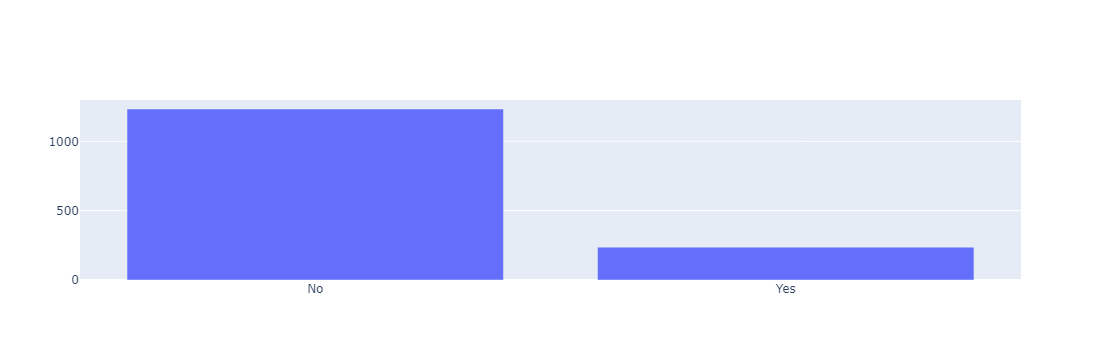

In [35]:
data = [go.Bar(
            x=attrition["Attrition"].value_counts().index.values,
            y= attrition["Attrition"].value_counts().values
    )]

py.iplot(data, filename='basic-bar')


In [36]:
# Import the train_test_split method from sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Split data into train and test sets as well as for validation and testing
train, test, target_train, target_val = train_test_split(attrition_final, 
                                                         target, 
                                                         train_size=0.80,
                                                         random_state=0)
# Alternatively, you can use StratifiedShuffleSplit
# stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
# for train_index, test_index in stratified_split.split(attrition_final, target):
#     train = attrition_final.iloc[train_index]
#     test = attrition_final.iloc[test_index]
#     target_train = target[train_index]
#     target_val = target[test_index]


In [37]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE oversampler
oversampler = SMOTE(random_state=0)

# Perform oversampling
smote_train, smote_target = oversampler.fit_resample(train, target_train)


In [38]:
seed = 0   # We set our random seed to zero for reproducibility
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 1000,
#     'warm_start': True, 
    'max_features': 0.3,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [39]:
rf = RandomForestClassifier(**rf_params)

In [40]:
rf.fit(smote_train, smote_target)
print("Fitting of Random Forest finished")

Fitting of Random Forest finished


In [41]:
rf_predictions = rf.predict(test)
print("Predictions finished")

Predictions finished


In [42]:
print("Accuracy score: {}".format(accuracy_score(target_val, rf_predictions)))
print("="*80)
print(classification_report(target_val, rf_predictions))

Accuracy score: 0.8537414965986394
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       245
           1       0.57      0.49      0.53        49

    accuracy                           0.85       294
   macro avg       0.74      0.71      0.72       294
weighted avg       0.85      0.85      0.85       294



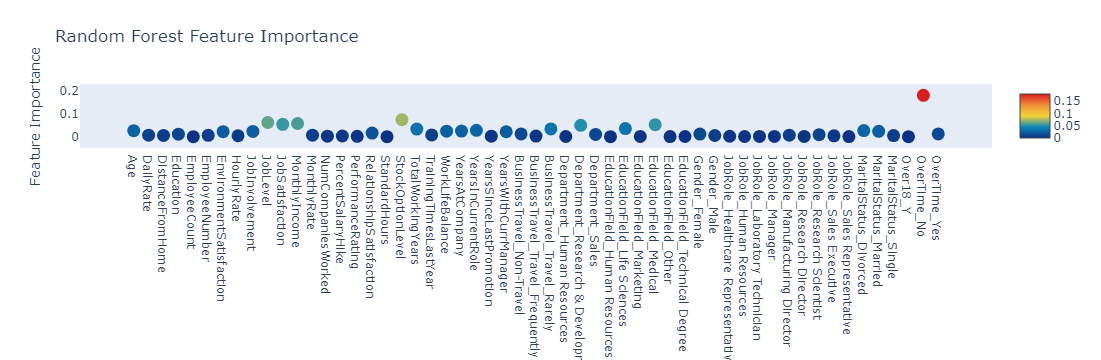

In [43]:
# Scatter plot 
trace = go.Scatter(
    y = rf.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')


In [44]:
from sklearn import tree
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
from subprocess import check_call
import re

decision_tree = tree.DecisionTreeClassifier(max_depth=4)
decision_tree.fit(train, target_train)

# Predicting results for test dataset
y_pred = decision_tree.predict(test)

# Export our trained model as a .dot file
tree.export_graphviz(decision_tree,
                     out_file="tree1.dot",
                     max_depth=4,
                     impurity=False,
                     feature_names=attrition_final.columns.values,
                     class_names=['No', 'Yes'],
                     rounded=True,
                     filled=True)

In [45]:
import os

# Check if the .dot file has been created
dot_file_path = "tree1.dot"
if os.path.isfile(dot_file_path):
    print("The .dot file has been created successfully.")
else:
    print("Error: The .dot file has not been created.")

# Optionally, inspect the contents of the .dot file
if os.path.isfile(dot_file_path):
    with open(dot_file_path, "r") as f:
        dot_contents = f.read()
    print("Contents of the .dot file:")
    print(dot_contents)


The .dot file has been created successfully.
Contents of the .dot file:
digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="TotalWorkingYears <= 1.5\nsamples = 1176\nvalue = [988, 188]\nclass = No", fillcolor="#ea995f"] ;
1 [label="MaritalStatus_Single <= 0.5\nsamples = 78\nvalue = [39, 39]\nclass = No", fillcolor="#ffffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="DistanceFromHome <= 16.5\nsamples = 39\nvalue = [27, 12]\nclass = No", fillcolor="#f1b991"] ;
1 -> 2 ;
3 [label="BusinessTravel_Travel_Frequently <= 0.5\nsamples = 31\nvalue = [25, 6]\nclass = No", fillcolor="#eb9f69"] ;
2 -> 3 ;
4 [label="samples = 27\nvalue = [24, 3]\nclass = No", fillcolor="#e89152"] ;
3 -> 4 ;
5 [label="samples = 4\nvalue = [1, 3]\nclass = Yes", fillcolor="#7bbeee"] ;
3 -> 5 ;
6 [label="EmployeeNumber <= 797.5\nsamples = 8\nvalue = [2, 6]\nclass = Yes", fillcolor="#7bbeee"] ;
2 -> 6 ;
7 [l

In [46]:
y_pred = decision_tree.predict(test)


In [47]:
# Export our trained model as a .dot file
with open("tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 4,
                              impurity = False,
                              feature_names = attrition_final.columns.values,
                              class_names = ['No', 'Yes'],
                              rounded = True,
                              filled= True )

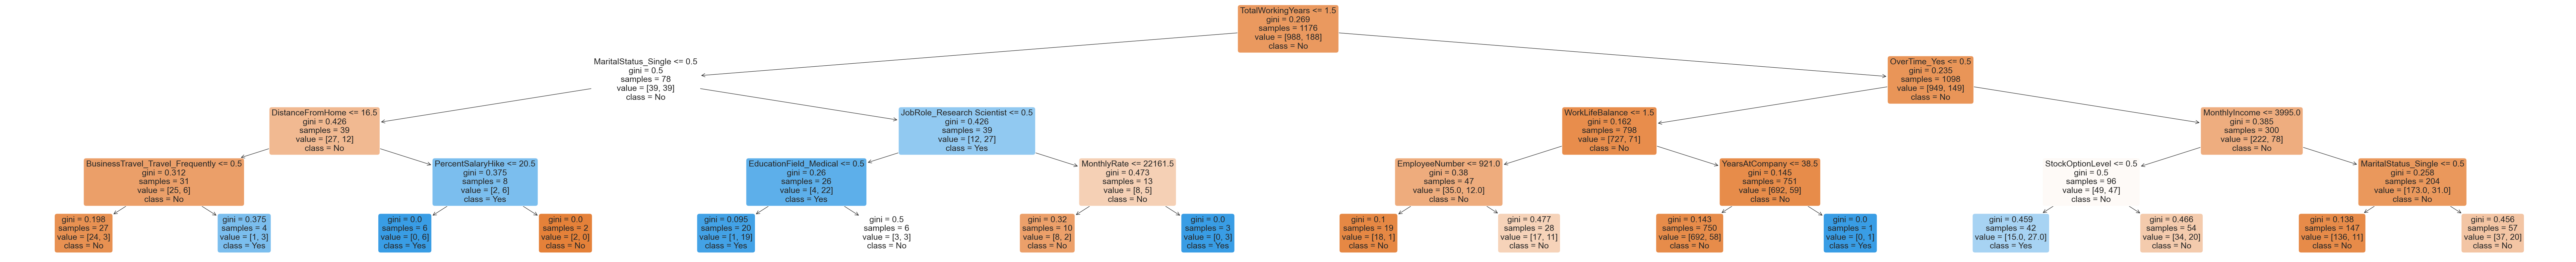

In [48]:
from sklearn import tree
import matplotlib.pyplot as plt

# Create decision tree classifier and fit the model
decision_tree = tree.DecisionTreeClassifier(max_depth=4)
decision_tree.fit(train, target_train)

# Plot the decision tree with a larger figure size
plt.figure(figsize=(100,10))  # Adjust the figure size as needed
tree.plot_tree(decision_tree,
               feature_names=attrition_final.columns.values,
               class_names=['No', 'Yes'],
               filled=True,
               rounded=True)
plt.show()

In [49]:
# Gradient Boosting Parameters
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : seed,
    'verbose': 0
}

In [50]:
gb = GradientBoostingClassifier(**gb_params)
# Fit the model to our SMOTEd train and target
gb.fit(smote_train, smote_target)
# Get our predictions
gb_predictions = gb.predict(test)
print("Predictions have finished")

Predictions have finished


In [51]:
print(accuracy_score(target_val, gb_predictions))
print(classification_report(target_val, gb_predictions))

0.8639455782312925
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.68      0.35      0.46        49

    accuracy                           0.86       294
   macro avg       0.78      0.66      0.69       294
weighted avg       0.85      0.86      0.85       294



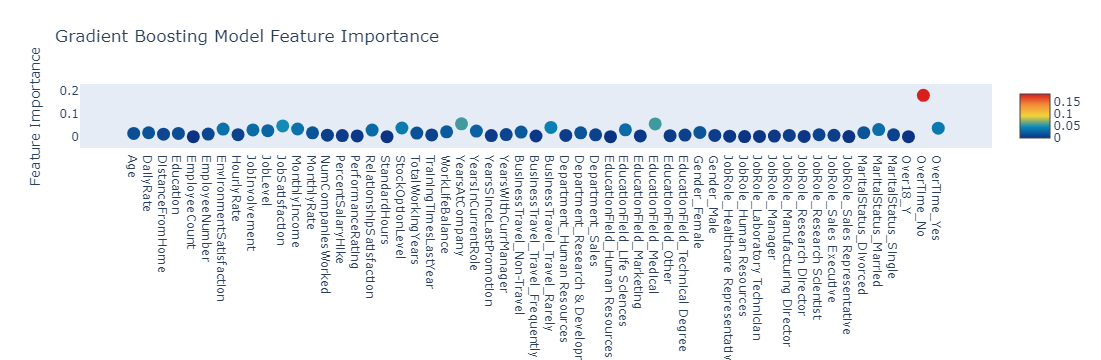

In [52]:
# Scatter plot 
trace = go.Scatter(
    y = gb.feature_importances_,
    x = attrition_final.columns.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = gb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = attrition_final.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Gradient Boosting Model Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter')

In [53]:
#Logistic Regression


from sklearn.linear_model import LogisticRegression

seed = 0  # Set the random seed for reproducibility

# Logistic Regression parameters
logreg_params = {
    'solver': 'liblinear',  # Specify the solver for logistic regression
    'penalty': 'l2',        # Specify the penalty (L2 regularization)
    'C': 1.0,               # Specify the regularization strength
    'random_state': seed    # Set the random state for reproducibility
}

# Create and train the logistic regression model
logreg = LogisticRegression(**logreg_params)
logreg.fit(smote_train, smote_target)

print("Fitting of Logistic Regression finished")

# Make predictions on the test set
logreg_predictions = logreg.predict(test)
print("Predictions finished")

# Evaluate the model
print("Accuracy score: {}".format(accuracy_score(target_val, logreg_predictions)))
print("="*80)
print(classification_report(target_val, logreg_predictions))


Fitting of Logistic Regression finished
Predictions finished
Accuracy score: 0.8707482993197279
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       245
           1       0.64      0.51      0.57        49

    accuracy                           0.87       294
   macro avg       0.77      0.73      0.75       294
weighted avg       0.86      0.87      0.86       294



In [54]:
from sklearn.ensemble import GradientBoostingClassifier

seed = 0  # Set the random seed for reproducibility

# GBM parameters
gbm_params = {
    'n_estimators': 100,       # Number of boosting stages
    'learning_rate': 0.1,      # Step size shrinkage used to prevent overfitting
    'max_depth': 3,            # Maximum depth of the individual estimators
    'min_samples_leaf': 1,     # Minimum number of samples required to be at a leaf node
    'random_state': seed       # Set the random state for reproducibility
}

# Create and train the GBM model
gbm = GradientBoostingClassifier(**gbm_params)
gbm.fit(smote_train, smote_target)

print("Fitting of GBM finished")

# Make predictions on the test set
gbm_predictions = gbm.predict(test)
print("Predictions finished")

# Evaluate the model
print("Accuracy score: {}".format(accuracy_score(target_val, gbm_predictions)))
print("="*80)
print(classification_report(target_val, gbm_predictions))


Fitting of GBM finished
Predictions finished
Accuracy score: 0.8639455782312925
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       245
           1       0.68      0.35      0.46        49

    accuracy                           0.86       294
   macro avg       0.78      0.66      0.69       294
weighted avg       0.85      0.86      0.85       294



In [55]:
from sklearn.svm import SVC

seed = 0  # Set the random seed for reproducibility

# SVM parameters
svm_params = {
    'kernel': 'rbf',        # Specify the kernel type (linear, poly, rbf, sigmoid, precomputed)
    'C': 1.0,               # Regularization parameter
    'gamma': 'scale',       # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'random_state': seed    # Set the random state for reproducibility
}

# Create and train the SVM model
svm_model = SVC(**svm_params)
svm_model.fit(smote_train, smote_target)

print("Fitting of SVM finished")

# Make predictions on the test set
svm_predictions = svm_model.predict(test)
print("Predictions finished")

# Evaluate the model
print("Accuracy score: {}".format(accuracy_score(target_val, svm_predictions)))
print("="*80)
print(classification_report(target_val, svm_predictions))


Fitting of SVM finished
Predictions finished
Accuracy score: 0.5816326530612245
              precision    recall  f1-score   support

           0       0.90      0.56      0.69       245
           1       0.24      0.69      0.36        49

    accuracy                           0.58       294
   macro avg       0.57      0.63      0.52       294
weighted avg       0.79      0.58      0.63       294



In [56]:
from sklearn.naive_bayes import GaussianNB

seed = 0  # Set the random seed for reproducibility

# Create and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(smote_train, smote_target)

print("Fitting of Naive Bayes finished")

# Make predictions on the test set
nb_predictions = nb_model.predict(test)
print("Predictions finished")

# Evaluate the model
print("Accuracy score: {}".format(accuracy_score(target_val, nb_predictions)))
print("="*80)
print(classification_report(target_val, nb_predictions))


Fitting of Naive Bayes finished
Predictions finished
Accuracy score: 0.7312925170068028
              precision    recall  f1-score   support

           0       0.92      0.75      0.82       245
           1       0.34      0.65      0.45        49

    accuracy                           0.73       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.82      0.73      0.76       294



In [57]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Desktop\HR-Employee-Attrition.csv")

# Define segmentation factors
segmentation_factors = ['Age', 'Gender', 'JobRole', 'PerformanceRating']

# Perform segmentation analysis
for factor in segmentation_factors:
    segments = data.groupby(factor)['Attrition'].value_counts(normalize=True).unstack()
    print(f"\nSegmentation Analysis based on {factor}:")
    print(segments)

    # You can further analyze or visualize the segments as needed



Segmentation Analysis based on Age:
Attrition        No       Yes
Age                          
18         0.500000  0.500000
19         0.333333  0.666667
20         0.454545  0.545455
21         0.538462  0.461538
22         0.687500  0.312500
23         0.714286  0.285714
24         0.730769  0.269231
25         0.769231  0.230769
26         0.692308  0.307692
27         0.937500  0.062500
28         0.708333  0.291667
29         0.735294  0.264706
30         0.850000  0.150000
31         0.739130  0.260870
32         0.819672  0.180328
33         0.793103  0.206897
34         0.883117  0.116883
35         0.871795  0.128205
36         0.913043  0.086957
37         0.880000  0.120000
38         0.965517  0.034483
39         0.857143  0.142857
40         0.912281  0.087719
41         0.850000  0.150000
42         0.956522  0.043478
43         0.937500  0.062500
44         0.818182  0.181818
45         0.951220  0.048780
46         0.878788  0.121212
47         0.875000  0.125000
48 

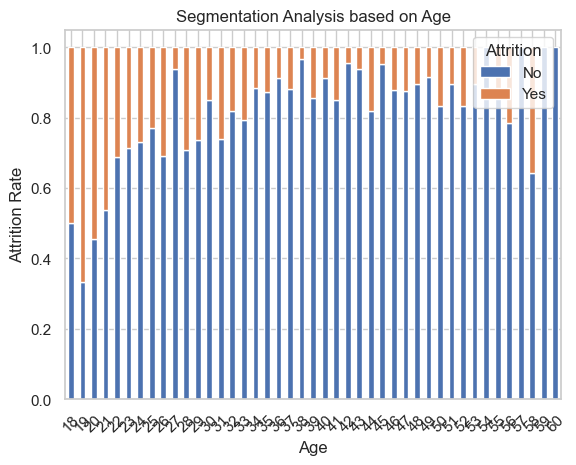

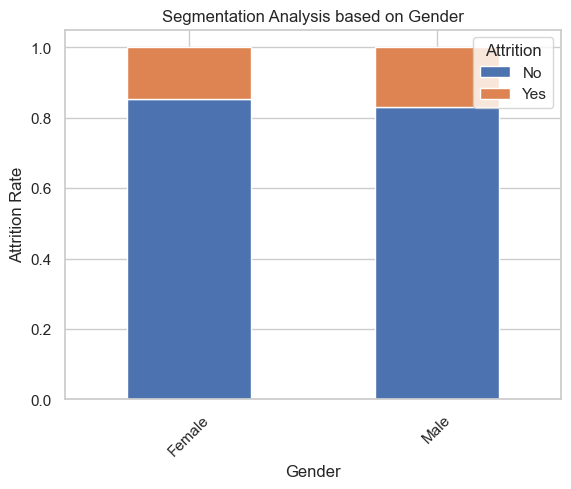

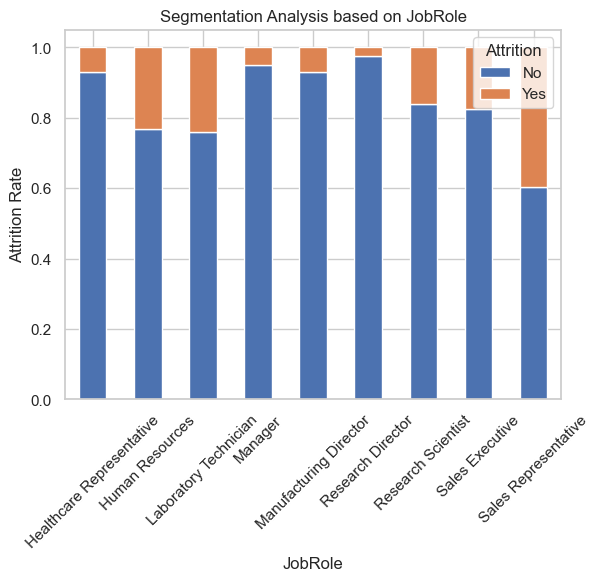

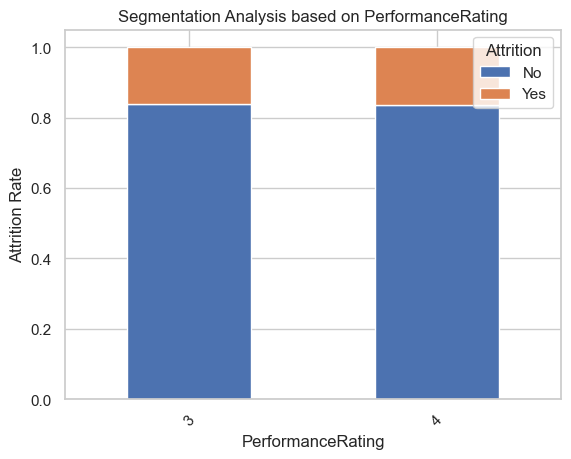

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Desktop\HR-Employee-Attrition.csv")

# Define segmentation factors
segmentation_factors = ['Age', 'Gender', 'JobRole', 'PerformanceRating']

# Perform segmentation analysis and visualize
for factor in segmentation_factors:
    segments = data.groupby(factor)['Attrition'].value_counts(normalize=True).unstack()
    
    # Plotting
    segments.plot(kind='bar', stacked=True)
    plt.title(f'Segmentation Analysis based on {factor}')
    plt.xlabel(factor)
    plt.ylabel('Attrition Rate')
    plt.legend(title='Attrition', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()


Attrition Rate: 16.12%
Total Recruitment Costs: $1,470,000.00
Total Training Costs: $2,057,500.00
Total Onboarding Costs: $88,000.00
Total Costs of Attrition: $3,615,500.00
Estimated Retention Costs: $1,541,194.72
Cost Comparison (Attrition Costs - Retention Costs): $2,074,305.28


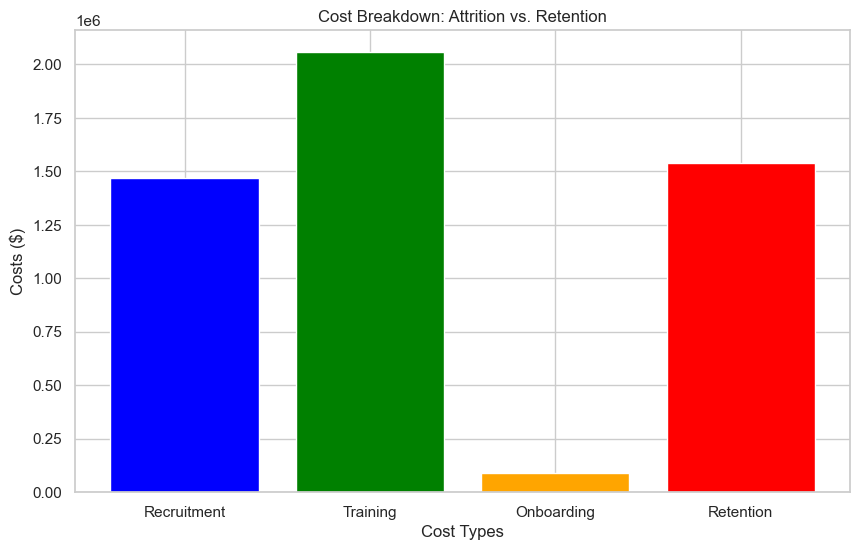

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Desktop\HR-Employee-Attrition.csv")

# Calculate attrition rate
attrition_rate = data['Attrition'].value_counts(normalize=True)['Yes']

# Estimate recruitment costs by job role
recruitment_costs = data.groupby('JobRole')['EmployeeNumber'].count() * 1000  # Assuming $1000 per recruitment

# Estimate training and onboarding costs
training_costs = (data['TrainingTimesLastYear'] * 500).sum()  # Assuming $500 per training session
onboarding_costs = ((data['YearsAtCompany'] < 1) * 2000).sum()  # Assuming $2000 for onboarding new employees

# Calculate total costs of attrition
total_recruitment_costs = recruitment_costs.sum()
total_training_costs = training_costs
total_onboarding_costs = onboarding_costs
total_costs = total_recruitment_costs + total_training_costs + total_onboarding_costs

# Estimate retention costs
average_salary = data['MonthlyIncome'].mean()
retention_costs = average_salary * len(data) * attrition_rate

# Compare attrition costs with retention costs
cost_comparison = total_costs - retention_costs

# Display results
print("Attrition Rate: {:.2f}%".format(attrition_rate * 100))
print("Total Recruitment Costs: ${:,.2f}".format(total_recruitment_costs))
print("Total Training Costs: ${:,.2f}".format(total_training_costs))
print("Total Onboarding Costs: ${:,.2f}".format(total_onboarding_costs))
print("Total Costs of Attrition: ${:,.2f}".format(total_costs))
print("Estimated Retention Costs: ${:,.2f}".format(retention_costs))
print("Cost Comparison (Attrition Costs - Retention Costs): ${:,.2f}".format(cost_comparison))

# Visualize costs
labels = ['Recruitment', 'Training', 'Onboarding', 'Retention']
costs = [total_recruitment_costs, total_training_costs, total_onboarding_costs, retention_costs]

plt.figure(figsize=(10, 6))
plt.bar(labels, costs, color=['blue', 'green', 'orange', 'red'])
plt.title('Cost Breakdown: Attrition vs. Retention')
plt.xlabel('Cost Types')
plt.ylabel('Costs ($)')
plt.show()


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load employee data
employee_data = pd.read_csv("Desktop\HR-Employee-Attrition.csv")

# Preprocess text data for recommendation system
employee_data['combined_text'] = employee_data['JobRole'] + ' ' + employee_data['Department'] + ' ' + employee_data['EducationField']

# Initialize TF-IDF vectorizer for recommendation system
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(employee_data['combined_text'])

# Train-test split for employee attrition prediction
X = employee_data.drop(columns=['Attrition', 'combined_text'])
X = pd.get_dummies(X)  # One-hot encode categorical variables
y = employee_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a machine learning model (Random Forest Classifier) for employee attrition prediction
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict attrition for test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Function to recommend similar employees based on text similarity
def recommend_employee(employee_id, cosine_sim=cosine_sim, top_n=5):
    idx = employee_data.index[employee_data['EmployeeNumber'] == employee_id].tolist()[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    employee_indices = [i[0] for i in sim_scores]
    return employee_data.iloc[employee_indices]

# Example: Recommend employees similar to EmployeeNumber 1
recommended_employees = recommend_employee(1)
print(recommended_employees)


Accuracy: 0.8775510204081632


NameError: name 'cosine_sim' is not defined

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute precision, recall, F1-score, and support
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute ROC curve and AUC score
probs = model.predict_proba(X_test)
probs = probs[:, 1]  # Keep probabilities for the positive class only
fpr, tpr, thresholds = roc_curve(y_test, probs)
auc = roc_auc_score(y_test, probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294

Confusion Matrix:
[[252   3]
 [ 33   6]]


ValueError: y_true takes value in {'No', 'Yes'} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute precision, recall, F1-score, and support
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))





Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.99      0.93       255
         Yes       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294

Confusion Matrix:
[[252   3]
 [ 33   6]]


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294

Confusion Matrix:
[[252   3]
 [ 33   6]]


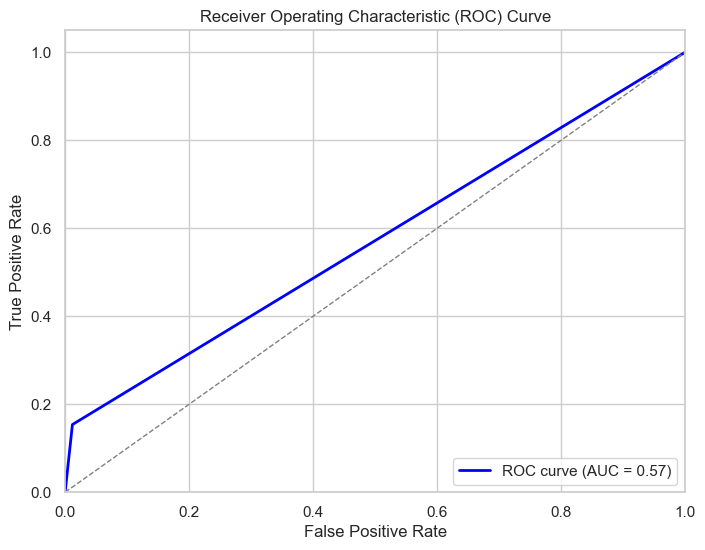

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Convert categorical predicted labels to numeric
y_pred_numeric = (y_pred == 'Yes').astype(int)

# Convert categorical true labels to numeric
y_test_numeric = (y_test == 'Yes').astype(int)

# Compute precision, recall, F1-score, and support
print("Classification Report:")
print(classification_report(y_test_numeric, y_pred_numeric))

# Compute confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_numeric, y_pred_numeric))

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_numeric, y_pred_numeric)
auc = roc_auc_score(y_test_numeric, y_pred_numeric)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
